In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [78]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
data.shape

(150, 5)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
np.unique(data['species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Handling Categorical data

In [82]:
class_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['species'] = data['species'].map(class_dict)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [83]:
features = data.iloc[:,:-1]
predictions = data.iloc[:,-1]

In [84]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
predictions.head()

,species
0,0
1,0
2,0
3,0
4,0


In [86]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [87]:
features.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=50, shuffle=True)

# **Now performing Exploratory DataAnalysis ( EDA )**

In [90]:
Train_data = pd.concat([X_train, y_train], axis=1, names=[features.columns,'species'])
Train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
125,1.643844,0.337848,1.274550,0.790591,2
98,-0.900681,-1.281972,-0.431421,-0.129720,1
73,0.310998,-0.587764,0.535296,0.001753,1
144,1.038005,0.569251,1.103953,1.710902,2
21,-0.900681,1.494863,-1.284407,-1.050031,0


In [91]:
Train_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.063613,0.008099,-0.028149,-0.023446,1.000000
std,1.000533,0.999773,1.000192,0.997969,0.830106
min,-1.870024,-2.438987,-1.568735,-1.444450,0.000000
25%,-0.900681,-0.587764,-1.284407,-1.181504,0.000000
50%,-0.113090,-0.124958,0.279400,0.133226,1.000000
75%,0.674501,0.627102,0.762759,0.790591,2.000000
max,2.249683,3.114684,1.672610,1.710902,2.000000


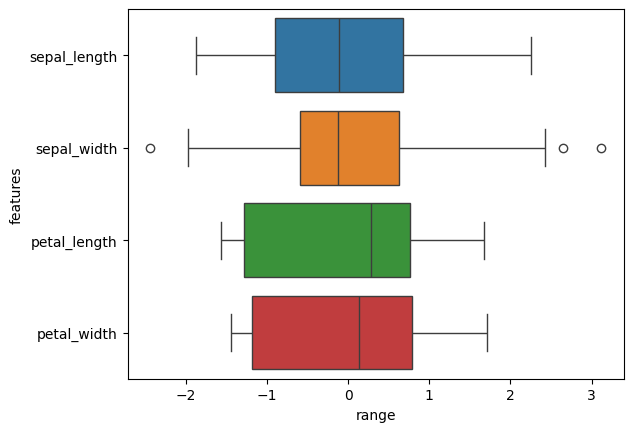

In [92]:
import seaborn as sns

sns.boxplot(data=X_train, orient='h').set(xlabel='range', ylabel='features')
plt.show()

The data contains outliers in the column 'sepal-width'. Now validating further using IQR rule and extracting outliers

In [93]:
def get_outliers_IQR(X):

    q1 = np.quantile(X, 0.25)
    q3 = np.quantile(X, 0.75)
    median = np.median(X)

    iqr =q3-q1

    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers = X[(X <= lower_bound) | (X >= upper_bound)]
    outlier_indices = np.where((X <= lower_bound) | (X >= upper_bound))
    return outliers, outlier_indices[0].tolist()

In order to ensure that we have a copy of the train data before dropping the outliers, we work with a copy of the train dataframe. This helps us avoid the hastle of generating the training data again from the original data.

In [94]:
Train_copy = Train_data.copy()
Train_copy.reset_index(drop=True, inplace=True)

outliers, outlier_indices = get_outliers_IQR(Train_copy['sepal_width'].to_numpy())
print('The outliers in the feature "sepal_width" are: ', outliers)
print('These are available on indexes: ', outlier_indices)

The outliers in the feature "sepal_width" are:  [ 3.11468391 -2.43898725  2.65187798]
These are available on indexes:  [22, 89, 117]


In [95]:
Train_copy.drop(outlier_indices, inplace=True)
Train_copy.reset_index(drop=True, inplace=True)
Train_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
112,1.038005,-0.124958,0.819624,1.447956,2
113,0.068662,0.337848,0.592162,0.790591,1
114,0.674501,-0.587764,1.047087,1.316483,2
115,1.643844,1.263460,1.331416,1.710902,2


In [96]:
Train_data.shape

(120, 5)

In [97]:
X_train = Train_copy.iloc[:,:-1]
y_train = Train_copy.iloc[:,-1]

In [98]:
y_train

,species
0,2
1,1
2,1
3,2
4,0
...,...
112,2
113,1
114,2
115,2


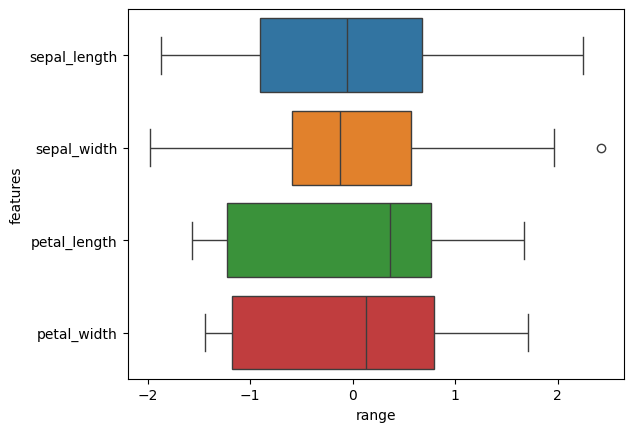

In [99]:
import seaborn as sns

sns.boxplot(data=X_train, orient='h').set(xlabel='range', ylabel='features')
plt.show()

The new data of 'sepal_width', still contains an outlier based on the IQR rule. Thus, the outlier dropping process has to be done again to ensure that the data is completely clean.

In [100]:
outliers, outlier_indices = get_outliers_IQR(Train_copy['sepal_width'].to_numpy())
print('The outliers in the feature "sepal_width" are: ', outliers)
print('These are available on indexes: ', outlier_indices)

The outliers in the feature "sepal_width" are:  [2.42047502]
These are available on indexes:  [46]


In [101]:
Train_copy.drop(outlier_indices, inplace=True)
Train_copy.reset_index(drop=True, inplace=True)
Train_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,1.643844,0.337848,1.274550,0.790591,2
1,-0.900681,-1.281972,-0.431421,-0.129720,1
2,0.310998,-0.587764,0.535296,0.001753,1
3,1.038005,0.569251,1.103953,1.710902,2
4,-0.900681,1.494863,-1.284407,-1.050031,0
...,...,...,...,...,...
111,1.038005,-0.124958,0.819624,1.447956,2
112,0.068662,0.337848,0.592162,0.790591,1
113,0.674501,-0.587764,1.047087,1.316483,2
114,1.643844,1.263460,1.331416,1.710902,2


In [102]:
X_train = Train_copy.iloc[:, :-1]
y_train = Train_copy.iloc[:,-1]

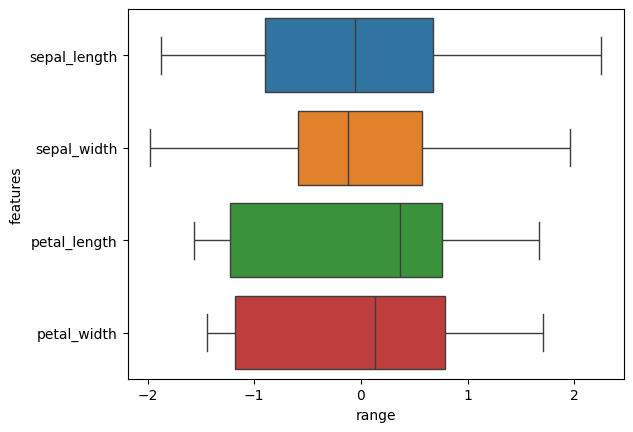

In [103]:
sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

We see no more outliers. All the outliers have been handled.

# **Class Distribution**

In [104]:
classes, count = np.unique(y_train, return_counts=True)
count

array([38, 37, 41])

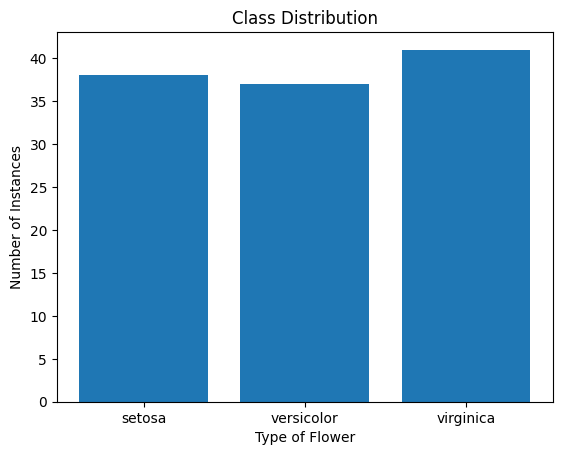

In [105]:
plt.bar(['setosa', 'versicolor', 'virginica'], count)
plt.title('Class Distribution')
plt.xlabel('Type of Flower')
plt.ylabel('Number of Instances')
plt.show()

The data is slightly disbalanced.

Correlation analysis

In [106]:
corr_mat = Train_copy.corr(method ='pearson') #Pearson correlation is used
corr_mat

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.127313,0.883475,0.825971,0.793662
sepal_width,-0.127313,1.000000,-0.398315,-0.330258,-0.414335
petal_length,0.883475,-0.398315,1.000000,0.959186,0.948916
petal_width,0.825971,-0.330258,0.959186,1.000000,0.955052
species,0.793662,-0.414335,0.948916,0.955052,1.000000


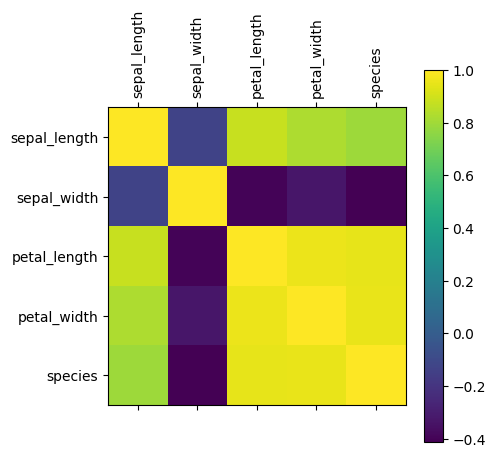

In [107]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

1. The features petal width and length show a stong correlation with the target variable.
2. The feature sepal width is not much correlated with the target variable.
3. The feature sepal length is moderately correlated with the target variable as compared to other features.

[]

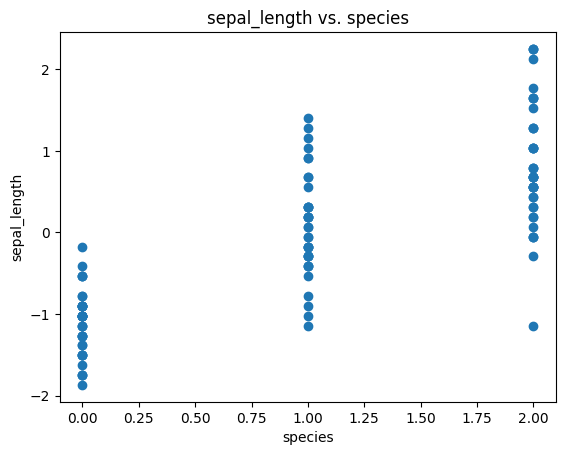

In [108]:
plt.scatter(y_train, X_train['sepal_length'])
plt.title("sepal_length vs. species")
plt.xlabel("species")
plt.ylabel("sepal_length")
plt.plot()

There is an overlap in the sepal length values across species. So, sepal length is not a strong distinguisher between species.

[]

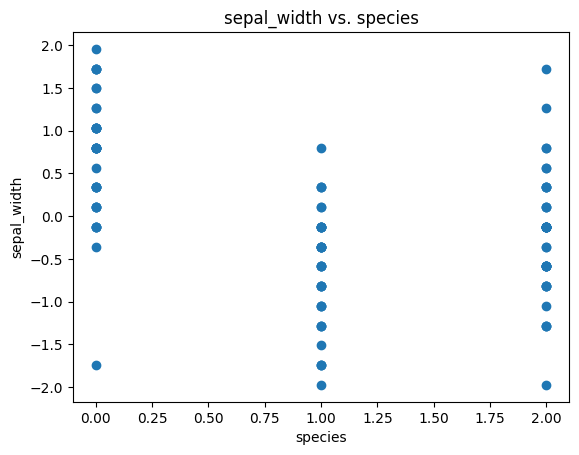

In [109]:
plt.scatter(y_train, X_train['sepal_width'])
plt.title("sepal_width vs. species")
plt.xlabel("species")
plt.ylabel("sepal_width")
plt.plot()

There is an overlap in the sepal width values across species. So, sepal width is also not a strong distinguisher between species.

[]

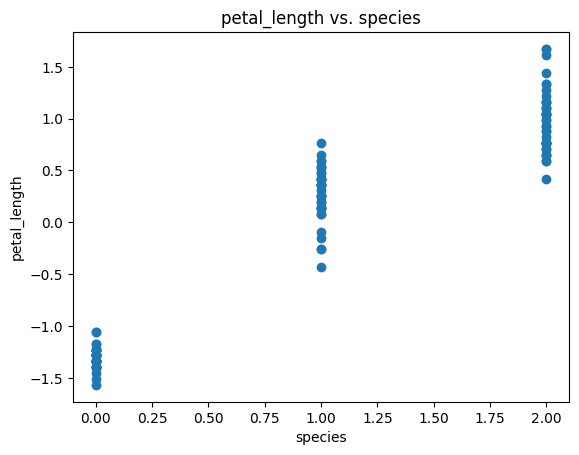

In [110]:
plt.scatter( y_train, X_train['petal_length'])
plt.title("petal_length vs. species")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.plot()

We can see that the petal length of the 0th species (setosa) is concentrated between -1 and -1.5. This can be helpful in distiguishing 0th species from the other two.
However, the 1st and the 2nd species have overlapping petal_length and therefore, these are indistinguishable using the petal_length feature alone.

[]

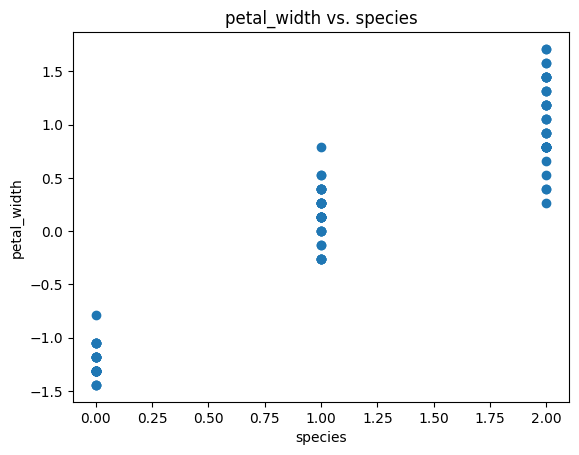

In [111]:
plt.scatter(y_train, X_train['petal_width'])
plt.title("petal_width vs. species")
plt.xlabel("species")
plt.ylabel("petal_width")
plt.plot()

Similar to our observations for petal_width, 0th species is quite distinguishable using petal_width as well.

The above observations from the visualization also mandate us to build an ML-model because merely using individual features we cannot simply distinguish the flower species.

# **Model building and Trainning**

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


The model quite accurately learns class 0; no errors for either train or test predictions. This result is intuitive, as we had seen in the visualizations that both petal_width and petal_length features easily distinguished class 0 from the other two classes.

Samples of class 1 is being misclassified as class 2 and vice-versa, by the model in both train and test data. One may work over these examples and improve the model.

Let us check the variations in our model performance by altering the parameters. Let us start with changing the solver.

We select 'saga' for the below reasons:-

*   It is acceptable for all the regularization techniques (None, 'l1', 'l2', or'elastic-net'). So, we can experiment with other parameters with more independence.
*   Ours is a multinomial (multi-class) data. Here, it is a three-class classificaiton.
*   It is fast.
*   The only downside is that it is not robust to unscaled datasets. However, our data is scaled already.



In [116]:
# solver='saga', random_state=0, penalty=None

model = LogisticRegression(solver='saga', random_state=0, penalty=None) #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.983
Train confusion matrix: 
 [[38  0  0]
 [ 0 36  1]
 [ 0  1 40]]
Test accuracy:  0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [117]:
# solver='saga', random_state=0, penalty=None, max_iter=1100

model = LogisticRegression(solver='saga', random_state=0, penalty=None, max_iter=1100) #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.983
Train confusion matrix: 
 [[38  0  0]
 [ 0 36  1]
 [ 0  1 40]]
Test accuracy:  0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


In [118]:
# solver='saga', random_state=0, penalty='l1'

model = LogisticRegression(solver='saga', random_state=0, penalty='l1') #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [119]:
# solver='saga', random_state=0, penalty='l2'

model = LogisticRegression(solver='saga', random_state=0, penalty='l2') #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


In [120]:
# solver='saga', random_state=0, penalty='l2', class_weight='balanced'

model = LogisticRegression(solver='saga', random_state=0, penalty='l2', class_weight='balanced') #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


In [121]:
# solver='saga', random_state=0, penalty='elasticnet', l1_ratio=0.5

model = LogisticRegression(solver='saga', random_state=0, penalty='elasticnet', l1_ratio=0.5) #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


In [122]:
# solver='saga', random_state=0, penalty='elasticnet', l1_ratio=0.1

model = LogisticRegression(solver='saga', random_state=0, penalty='elasticnet', l1_ratio=0.1) #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.9
Test confusion matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


In [123]:
# solver='saga', random_state=0, penalty='elasticnet', l1_ratio=0.9

model = LogisticRegression(solver='saga', random_state=0, penalty='elasticnet', l1_ratio=0.9, max_iter=200) #Define an object of Logistic Regression class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set


# Print the evaluation metrics on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Train accuracy:  0.974
Train confusion matrix: 
 [[38  0  0]
 [ 0 35  2]
 [ 0  1 40]]
Test accuracy:  0.933
Test confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


# **Conlusion**

A three class logistic regression classifier to predict the species of the iris flower based on the available four features has been trained with a test accuracy of 0.933.